In [1]:
import numpy as np
import gsd.hoomd
import math
import matplotlib.pyplot as plt

In [2]:

equi_file = 'Equil_traj_N_13000_rho_0.250.gsd'
traj = gsd.hoomd.open(equi_file, mode = 'r')

In [3]:
index = -1
typeid = traj[index].particles.typeid
pos_B  = traj[index].particles.position[typeid == 1]
img_B = traj[index].particles.image[typeid == 1]
real_pos = pos_B + traj[index].configuration.box[0:3] * img_B

In [4]:
cn = np.zeros(len(pos_B))

def minimum_image_convention(pos, box):
    # Compute pairwise distance vectors
    dx = np.abs(pos[:, 0][:, np.newaxis] - pos[:, 0])
    dy = np.abs(pos[:, 1][:, np.newaxis] - pos[:, 1])
    dz = np.abs(pos[:, 2][:, np.newaxis] - pos[:, 2])
    
    dx = np.where(dx > 0.5 * box[0], dx - box[0], dx)
    dx = np.where(dx < -0.5 * box[0], dx + box[0], dx)
    
    dy = np.where(dy > 0.5 * box[1], dy - box[1], dy)
    dy = np.where(dy < -0.5 * box[1], dy + box[1], dy)

    dz = np.where(dz > 0.5 * box[2], dz - box[2], dz)
    dz = np.where(dz < -0.5 * box[2], dz + box[2], dz)
    
    # Compute distances
    dist = np.sqrt(dx**2 + dy**2 + dz**2)
    
    return dist

arr = minimum_image_convention(pos_B,traj[index].configuration.box[0:3])
for i in range(len(arr)):
    for j in range(i+1,len(arr)):
        if (arr[i][j] < 0.2):
            #print(i,j)
            cn[i] += 1

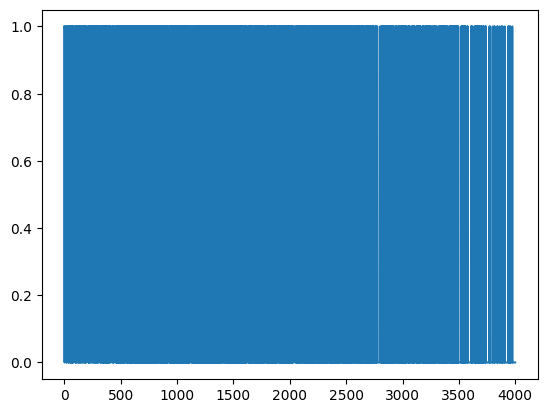

In [5]:
plt.plot(range(len(pos_B)),cn)

In [6]:
numbonds = 0
for i in cn:
    if (i == 1):
        numbonds += 1

In [7]:
numbonds

1816